In [3]:
%pip install -q ipympl
%pip install cufflinks
%matplotlib widget

import matplotlib.pyplot as plt
import numpy as np

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


### Wie kann ich optimale Koeffizienten für mein lineares Modell bestimmen ?

==> Optimierung(Minimierung) einer Kostenfunktion  ==>  Residuen(-Fehler) RSS (Residual Sum of Squares)

In [4]:
# Beispieldaten erzeugen
x = np.random.rand(60, 1).reshape(60)
y_err = np.random.normal(0,3,60)
y = 3 + 50 * x + y_err
x, y

(array([0.12262913, 0.17407454, 0.39576784, 0.10179949, 0.69138013,
        0.44987489, 0.62706679, 0.85068237, 0.63972694, 0.15077565,
        0.45824285, 0.44511619, 0.33236495, 0.32047048, 0.60554231,
        0.2935382 , 0.15402713, 0.23668725, 0.22783092, 0.03789647,
        0.89395309, 0.07923352, 0.18569974, 0.12177403, 0.53969055,
        0.20856666, 0.85744003, 0.95186472, 0.75973419, 0.96850882,
        0.82897234, 0.77595806, 0.51554375, 0.73780285, 0.18520427,
        0.19522653, 0.05800762, 0.91713692, 0.22651865, 0.87816003,
        0.0368768 , 0.57605525, 0.36543167, 0.53704957, 0.91459205,
        0.94822922, 0.45317824, 0.33938864, 0.08115712, 0.69419578,
        0.2068637 , 0.17959462, 0.19551009, 0.27603136, 0.29074085,
        0.80000232, 0.37738751, 0.68182693, 0.29324402, 0.75008773]),
 array([10.63827772, 11.60843032, 23.19896575,  9.15544014, 37.69721942,
        25.63568128, 35.94167027, 47.28708559, 41.31212491,  8.07417326,
        22.78137618, 31.27322219, 19

In [5]:
# Modell-Funktion
def lineares_model(x, m=30, b=2):
    return m * x + b

Text(0, 0.5, 'y')

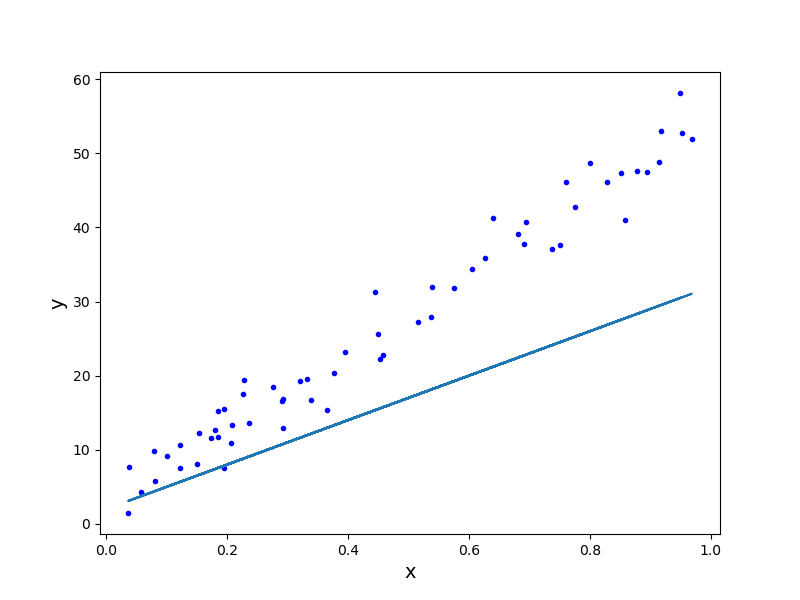

In [6]:
plt.figure(figsize=(8,6))
plt.plot(x,y, '.b')
plt.plot(x, lineares_model(x), '-')
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)

In [7]:
def fehler(x, y, m, b):
    y_gerade = lineares_model(x, m, b)
    return (y - y_gerade)

def quadrierte_fehler(x, y, m, b):
    return fehler(x, y, m, b) ** 2 # np.round( , 2)

def summe_quadrierter_fehler(x, y, m, b):
    return sum(quadrierte_fehler(x, y, m, b)) # round(, 2)

In [8]:
summe_quadrierter_fehler(x, y, 30, 2)

9526.116916339584

Text(0, 0.5, 'y')

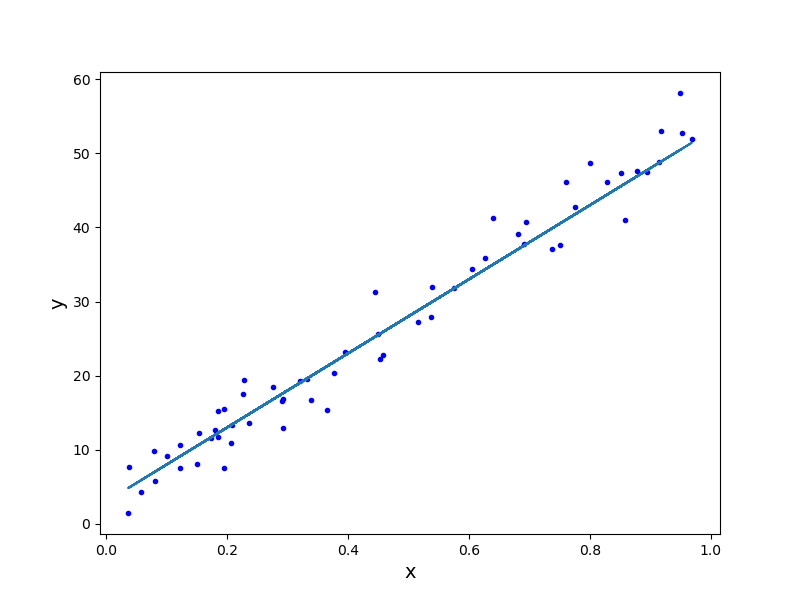

In [9]:
plt.figure(figsize=(8,6))
plt.plot(x, y, '.b')
plt.plot(x, lineares_model(x, 50, 3), '-')
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)

In [10]:
summe_quadrierter_fehler(x, y, 50, 3)

521.7516163608894

Text(0.5, 1.0, 'RSS Änderung bzgl. der Steigung m')

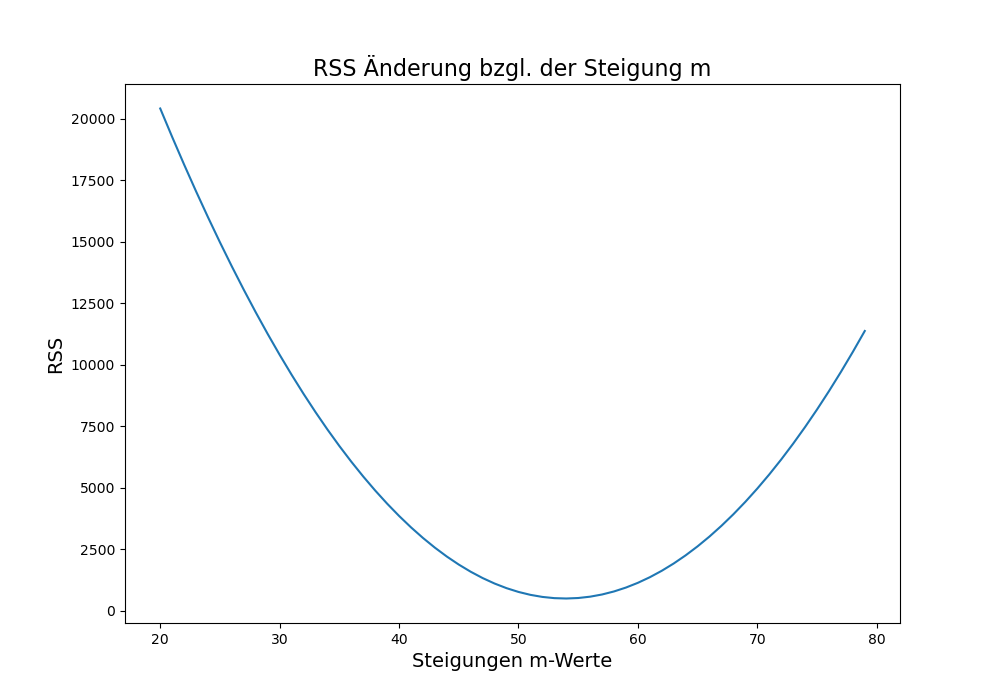

In [11]:
matrix = np.zeros((60, 2))
for idx, m in enumerate(range(20,80)):
    matrix[idx, 0] = m
    matrix[idx, 1] = summe_quadrierter_fehler(x, y, m, 1.319) # b = als Beispiel 

plt.figure(figsize=(10,7))
plt.plot(matrix[:,0], matrix[:,1], '-')
plt.xlabel('Steigungen m-Werte', fontsize=14)
plt.ylabel('RSS', fontsize=14)
plt.title('RSS Änderung bzgl. der Steigung m', fontsize=16)

Text(0.5, 1.0, 'RSS Änderung bzgl. der Steigung m')

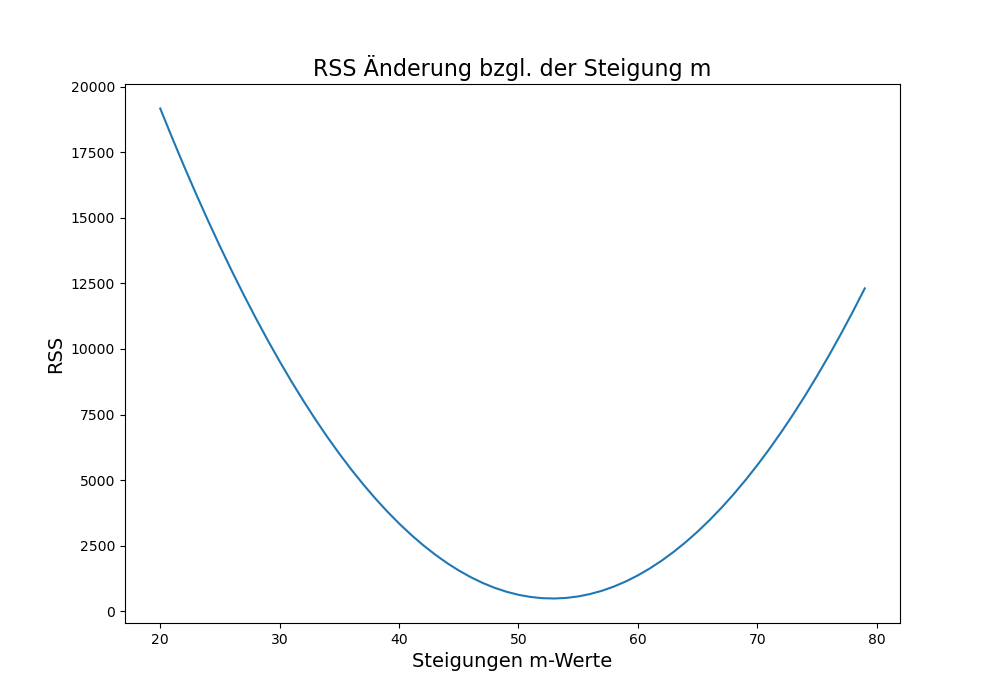

In [12]:
# Darstellung mit beiden variablen Koeffizienten
matrix = np.zeros((60, 60, 3))

midx = 0
for m in range(20,80):
    bidx = 0
    for b in range(-30,30):
        matrix[midx, bidx, 0] = m
        matrix[midx, bidx, 1] = b
        matrix[midx, bidx, 2] = summe_quadrierter_fehler(x, y, m, b) # b jetzt variabel
        bidx += 1
    midx += 1

plt.figure(figsize=(10,7))
plt.plot(matrix[:, 32 , 0], matrix[:, 32, 2], '-')
plt.xlabel('Steigungen m-Werte', fontsize=14)
plt.ylabel('RSS', fontsize=14)
plt.title('RSS Änderung bzgl. der Steigung m', fontsize=16)


In [13]:
import pandas as pd
import cufflinks as cf

cf.go_offline()
N = len(matrix)*len(matrix[0])
print(N)
M = np.array(matrix[:,:,0])
M = M.reshape(N)
B = np.array(matrix[:,:,1])
B = B.reshape(N)
RSS = np.array(matrix[:,:,2])
RSS = RSS.reshape(N)

df3 = pd.DataFrame({'x':M,'y':B,'z':RSS})

df3 = df3.pivot(index='x', columns='y', values='z')

df3.iplot(kind='surface',colorscale='rdylbu')


3600


In [14]:
M, B, RSS

(array([20., 20., 20., ..., 79., 79., 79.]),
 array([-30., -29., -28., ...,  27.,  28.,  29.]),
 array([138079.79331792, 132503.77599782, 127047.75867771, ...,
         85142.12601795,  89615.46495049,  94208.80388304]))

def minimum(X, Y, Z):
    min_x = min(X)
    max_x = max(X)
    n = len(X)

    # Feature-Skalierung
    X = (X - min_x) / (max_x - min_x) # x : [0..1]

    # Lernrate
    learnrate = 0.2

    # theta0s also unsere B's
    theta0s = []
    # theta1s also unsere M's
    theta1s = []

    theta0 = 0
    theta1 = 0

    # Gradientenabstieg
    for step in range(0,1000):
        y_pred = theta0 + X * theta1 # eigentlich linares_model()
        theta1_new = theta1 - learnrate * (1 / n) * sum(X * (y_pred - Y))  # Anpassung der Koeffizienten
        theta0_new = theta0 - learnrate * (1 / n) * sum(y_pred - Y)
        theta0, theta1 = theta0_new, theta1_new # swap
        if step % 50 == 0:
            theta0s.append(theta0)
            theta1s.append(theta1)


    


minimum(M, B, RSS)

In [15]:
def gradient_schritt(x, y, m, b, lernrate):
    dm = 0
    db = 0

    n = len(x)
    for i in range(n):
        # partiellen gradienten bestimmen
        y_pred = (x[i] * m + b)
        dm += -(2/n) * (x[i] * (y[i] - y_pred))
        db += -(2/n) * (y[i] - y_pred)
        

    neu_dm = m - (lernrate * dm)
    neu_db = b - (lernrate * db)

    return (neu_dm, neu_db)

In [16]:
# X = np.array(matrix[:, 32 , 0])
# Y = np.array(matrix[:, 32, 2])
X = x
y = y
schritt_1 = gradient_schritt(X, y, 0, 0, .5)
schritt_1

X, y

(array([0.12262913, 0.17407454, 0.39576784, 0.10179949, 0.69138013,
        0.44987489, 0.62706679, 0.85068237, 0.63972694, 0.15077565,
        0.45824285, 0.44511619, 0.33236495, 0.32047048, 0.60554231,
        0.2935382 , 0.15402713, 0.23668725, 0.22783092, 0.03789647,
        0.89395309, 0.07923352, 0.18569974, 0.12177403, 0.53969055,
        0.20856666, 0.85744003, 0.95186472, 0.75973419, 0.96850882,
        0.82897234, 0.77595806, 0.51554375, 0.73780285, 0.18520427,
        0.19522653, 0.05800762, 0.91713692, 0.22651865, 0.87816003,
        0.0368768 , 0.57605525, 0.36543167, 0.53704957, 0.91459205,
        0.94822922, 0.45317824, 0.33938864, 0.08115712, 0.69419578,
        0.2068637 , 0.17959462, 0.19551009, 0.27603136, 0.29074085,
        0.80000232, 0.37738751, 0.68182693, 0.29324402, 0.75008773]),
 array([10.63827772, 11.60843032, 23.19896575,  9.15544014, 37.69721942,
        25.63568128, 35.94167027, 47.28708559, 41.31212491,  8.07417326,
        22.78137618, 31.27322219, 19

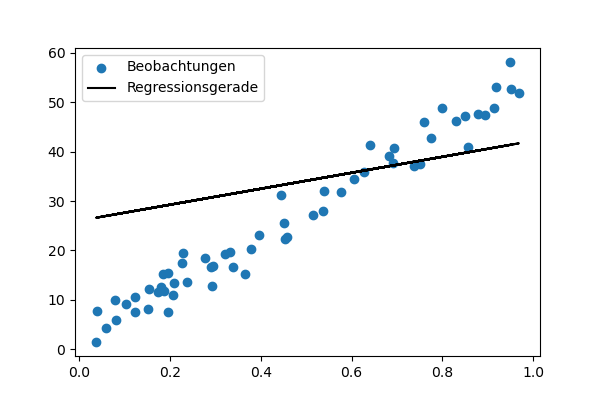

In [17]:
fig = plt.figure(figsize=(6,4))
plt.scatter(X, y, label="Beobachtungen")
plt.plot(X, lineares_model(X, schritt_1[0], schritt_1[1]), color='k', label = 'Regressionsgerade')
plt.legend()
plt.show()

In [18]:
summe_quadrierter_fehler(X, y, schritt_1[0], schritt_1[1])

10259.898703214323

In [19]:
def test(m, b):
    schritt = gradient_schritt(X, y, m, b, .5)
    return (schritt[0], schritt[1], summe_quadrierter_fehler(X, y, schritt[0], schritt[1]))

In [20]:
naechster_schritt = test(0, 0)

naechster_schritt

(16.150602579638186, 26.03278911566314, 10259.898703214323)

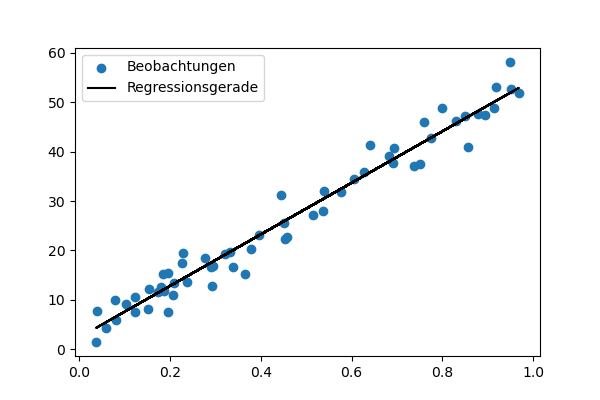

In [21]:
from matplotlib.animation import FuncAnimation
# %pip install -q ipympl
%matplotlib widget

naechster_schritt = test(0, 0)

for i in range(0,1000):
    rss = naechster_schritt[2]
    naechster_schritt = test(naechster_schritt[0], naechster_schritt[1])
    if (rss-naechster_schritt[2] < .1): break

fig = plt.figure(figsize=(6,4))
plt.scatter(X, y, label="Beobachtungen")
plt.plot(X, lineares_model(X, naechster_schritt[0], naechster_schritt[1]), color='k', label = 'Regressionsgerade')
plt.legend()
plt.show()

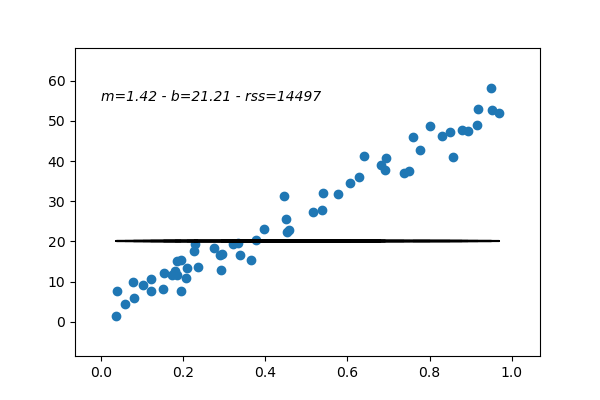

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython import display

%matplotlib widget


def step(m, b):
    schritt = gradient_schritt(X, y, m, b, .1)
    return (schritt[0], schritt[1], summe_quadrierter_fehler(X, y, schritt[0], schritt[1]))

fig, ax = plt.subplots(figsize=(6,4))
ax.axis([min(X)-.1,max(X)+.1, min(y)-10,max(y)+10])
ax.scatter(X, y)
line, = ax.plot([],[], color='k')
line.set_data(X, lineares_model(X, 0, 20))

naechster_schritt = step(0, 20)
mt = naechster_schritt[0]
bt = naechster_schritt[1]
rt = int(naechster_schritt[2])
text = ax.text(0, 55, f'm={mt:.2f} - b={bt:.2f} - rss={rt:d}', style='italic')

def animate(frame_num):
    global naechster_schritt
    global text
    if True: # frame_num%5 == 0:
        naechster_schritt = step(naechster_schritt[0], naechster_schritt[1])
        mt = naechster_schritt[0]
        bt = naechster_schritt[1]
        rt = int(naechster_schritt[2])
        # text = ax.text(0, 55, f'm={mt:.2f} - b={bt:.2f} - rss={rt:d}', style='italic')
        text.set_text(f'm={mt:.2f} - b={bt:.2f} - rss={rt:d}')
        # frame_num/100
        line.set_data((X, lineares_model(X, naechster_schritt[0], naechster_schritt[1])))
    return line

anim = FuncAnimation(fig, animate, frames=1000, interval=10)

plt.show()